In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('repay_loans.csv')

In [3]:
data.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672.0,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794.0,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734.0,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518.0,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049.0,1,11415,2010-07-07,2012-05-21,3.13


In [4]:
data.isna().sum() #to find the missing values

client_id      0
loan_type      0
loan_amount    3
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           5
dtype: int64

In [5]:
data.info() # to know primary details about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   client_id    443 non-null    int64  
 1   loan_type    443 non-null    object 
 2   loan_amount  440 non-null    float64
 3   repaid       443 non-null    int64  
 4   loan_id      443 non-null    int64  
 5   loan_start   443 non-null    object 
 6   loan_end     443 non-null    object 
 7   rate         438 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 27.8+ KB


In [6]:
data.describe()#statistical summary

,client_id,loan_amount,repaid,loan_id,rate
count,443.000000,440.000000,443.000000,443.000000,438.000000
mean,38911.060948,7979.997727,0.534989,11017.101580,3.222306
std,7768.681063,4187.031155,0.499338,581.826222,2.410354
min,25707.000000,559.000000,0.000000,10009.000000,0.010000
25%,32885.000000,4218.750000,0.000000,10507.500000,1.212500
50%,39505.000000,8310.500000,1.000000,11033.000000,2.815000
75%,46109.000000,11752.750000,1.000000,11526.000000,4.780000
max,49624.000000,14971.000000,1.000000,11991.000000,12.620000


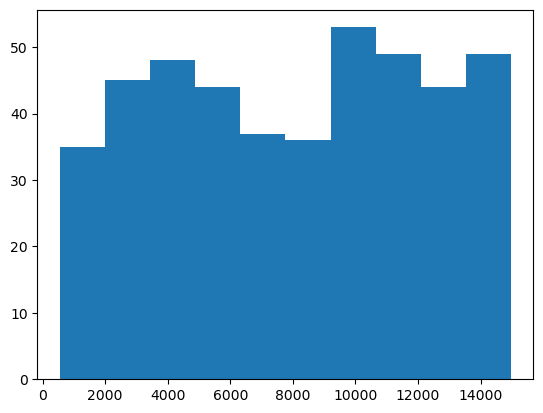

In [7]:
plt.hist(data['loan_amount'])
plt.show()



In [8]:
#data is distributed mostly on the right side of the histogram so we can only use median

#numerical type or int type data is filled with mean or median as per historical data
#mod is used on categorical or object type data

data['loan_amount']=data['loan_amount'].fillna(data['loan_amount'].median())

In [9]:
data.isna().sum()

client_id      0
loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           5
dtype: int64

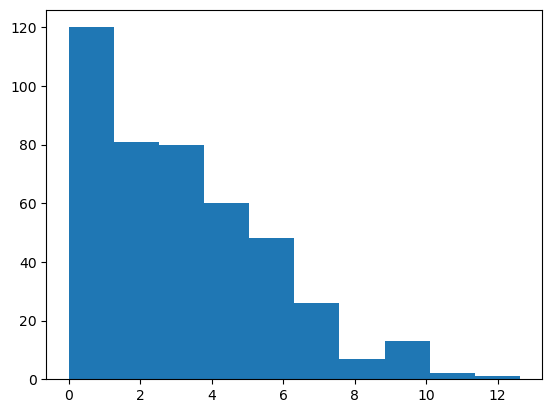

In [10]:
plt.hist(data['rate'])
plt.show()


In [11]:
data['rate']=data['rate'].fillna(data['rate'].median())

In [12]:
data.isna().sum()
data.describe()
data.head(5)

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672.0,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794.0,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734.0,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518.0,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049.0,1,11415,2010-07-07,2012-05-21,3.13


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


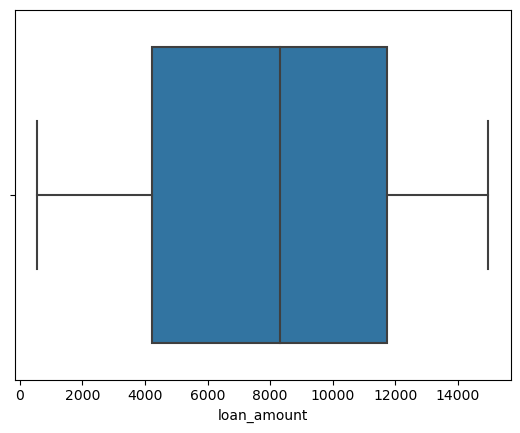

In [13]:
sns.boxplot(data['loan_amount'],orient='vertical')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


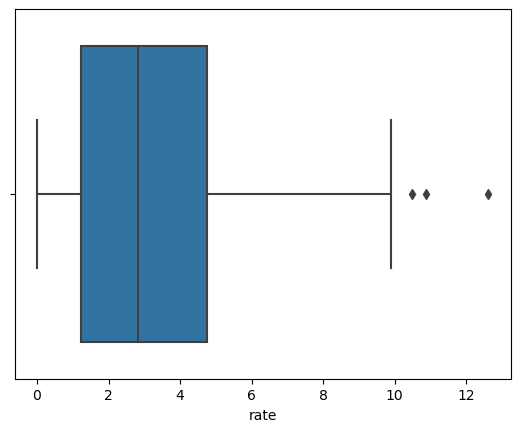

In [14]:
sns.boxplot(data['rate'],orient='vertical')
plt.show()

In [15]:
#outlier handling
q1 = data['rate'].quantile(0.25)
q2 = data['rate'].quantile(0.5)
q3 = data['rate'].quantile(0.75)


In [16]:
print(q1,q2,q3)

1.22 2.815 4.75


In [17]:
iqr =q3 - q1

In [18]:
ic = q1-(1.5*iqr)
uc = q3+(1.5*iqr)

In [19]:
print(ic,uc)

-4.075 10.045


In [20]:
data[(data['rate']>uc) | (data['rate']<ic)].index

Int64Index([41, 195, 421], dtype='int64')

In [21]:
data=data.drop([41,195,421])

In [22]:
#label encoding is used on target coloumn
#in this type we are using one hot encoding
data['loan_type'].unique()

array(['home', 'credit', 'cash', 'other'], dtype=object)

In [23]:
data['loan_start']=pd.to_datetime(data['loan_start'])
data['loan_end']=pd.to_datetime(data['loan_end'])

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 442
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   client_id    440 non-null    int64         
 1   loan_type    440 non-null    object        
 2   loan_amount  440 non-null    float64       
 3   repaid       440 non-null    int64         
 4   loan_id      440 non-null    int64         
 5   loan_start   440 non-null    datetime64[ns]
 6   loan_end     440 non-null    datetime64[ns]
 7   rate         440 non-null    float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(1)
memory usage: 30.9+ KB


In [25]:
data['tenure'] = data['loan_end'] - data['loan_start']

In [26]:
data.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,tenure
0,46109,home,13672.0,0,10243,2002-04-16,2003-12-20,2.15,613 days
1,46109,credit,9794.0,0,10984,2003-10-21,2005-07-17,1.25,635 days
2,46109,home,12734.0,1,10990,2006-02-01,2007-07-05,0.68,519 days
3,46109,cash,12518.0,1,10596,2010-12-08,2013-05-05,1.24,879 days
4,46109,credit,14049.0,1,11415,2010-07-07,2012-05-21,3.13,684 days


In [27]:
data['tenure'] = data['tenure'].dt.days

In [28]:
data.columns
req_cols = ['loan_type','loan_amount','tenure','rate']

In [29]:
data.head(5)

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,tenure
0,46109,home,13672.0,0,10243,2002-04-16,2003-12-20,2.15,613
1,46109,credit,9794.0,0,10984,2003-10-21,2005-07-17,1.25,635
2,46109,home,12734.0,1,10990,2006-02-01,2007-07-05,0.68,519
3,46109,cash,12518.0,1,10596,2010-12-08,2013-05-05,1.24,879
4,46109,credit,14049.0,1,11415,2010-07-07,2012-05-21,3.13,684


In [30]:
#data splitting
x=data[req_cols]
y=data['repaid']

In [31]:
x = pd.get_dummies(x,dtype=int)

In [32]:
x.head()

,loan_amount,tenure,rate,loan_type_cash,loan_type_credit,loan_type_home,loan_type_other
0,13672.0,613,2.15,0,0,1,0
1,9794.0,635,1.25,0,1,0,0
2,12734.0,519,0.68,0,0,1,0
3,12518.0,879,1.24,1,0,0,0
4,14049.0,684,3.13,0,1,0,0


In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
x_train

,loan_amount,tenure,rate,loan_type_cash,loan_type_credit,loan_type_home,loan_type_other
268,10120.0,832,2.420,0,1,0,0
296,7914.0,946,5.250,0,1,0,0
31,7061.0,654,4.230,0,0,1,0
85,5200.0,862,5.720,0,1,0,0
303,6473.0,783,5.180,1,0,0,0
...,...,...,...,...,...,...,...
107,6484.0,662,1.140,0,0,0,1
272,6129.0,581,2.815,0,0,0,1
350,3504.0,759,0.220,0,0,1,0
438,12963.0,928,2.460,0,0,0,1


In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lr = LogisticRegression()

In [37]:
lr.fit(x_train,y_train)

LogisticRegression()

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
y_pred =lr.predict(x_test)

In [40]:
accuracy_score(y_test,y_pred)

0.5454545454545454

In [41]:
data.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,tenure
0,46109,home,13672.0,0,10243,2002-04-16,2003-12-20,2.15,613
1,46109,credit,9794.0,0,10984,2003-10-21,2005-07-17,1.25,635
2,46109,home,12734.0,1,10990,2006-02-01,2007-07-05,0.68,519
3,46109,cash,12518.0,1,10596,2010-12-08,2013-05-05,1.24,879
4,46109,credit,14049.0,1,11415,2010-07-07,2012-05-21,3.13,684


In [42]:
x

,loan_amount,tenure,rate,loan_type_cash,loan_type_credit,loan_type_home,loan_type_other
0,13672.0,613,2.15,0,0,1,0
1,9794.0,635,1.25,0,1,0,0
2,12734.0,519,0.68,0,0,1,0
3,12518.0,879,1.24,1,0,0,0
4,14049.0,684,3.13,0,1,0,0
...,...,...,...,...,...,...,...
438,12963.0,928,2.46,0,0,0,1
439,1728.0,511,5.27,0,1,0,0
440,9329.0,948,5.65,0,0,0,1
441,4197.0,633,4.50,0,0,1,0


In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 0, 38],
       [ 2, 48]], dtype=int64)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
m = []
n = np.arange(3,15)
for k in n:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_train,y_train)
    pred = clf.predict(x_test)
    acc = accuracy_score(y_test,pred)
    m.append(acc)
    

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [46]:
m

[0.4318181818181818,
 0.4431818181818182,
 0.5340909090909091,
 0.48863636363636365,
 0.5454545454545454,
 0.5681818181818182,
 0.5909090909090909,
 0.5568181818181818,
 0.5113636363636364,
 0.48863636363636365,
 0.5340909090909091,
 0.48863636363636365]

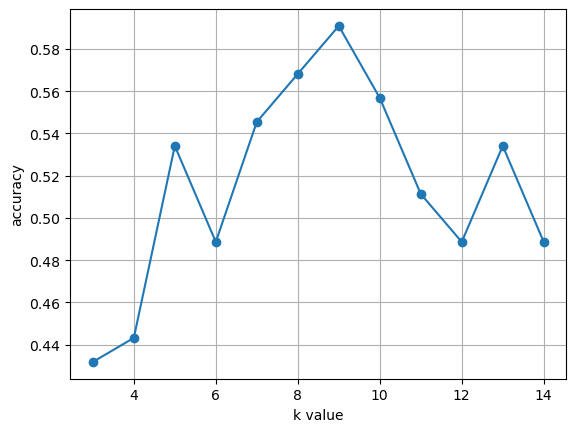

In [47]:
plt.plot(n,m,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [48]:
clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(x_train,y_train)

    

KNeighborsClassifier(n_neighbors=9)

In [49]:
y_pred_knn = clf.predict(x_test)
acc_knn = accuracy_score(y_test,y_pred_knn)
print(acc_knn)

0.5909090909090909


C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [50]:
from sklearn.svm import SVC
svc= SVC()
import warnings
warnings.filterwarnings("ignore")

In [51]:
svc.fit(x_train,y_train)

SVC()

In [52]:
y_pred_svc = svc.predict(x_test)


In [53]:
acc_svc = accuracy_score(y_test,y_pred_svc)
print(acc_svc)

0.5681818181818182


In [54]:
#decision tree


In [55]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [56]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [57]:
y_pred_dt = dt.predict(x_test)

In [59]:
accuracy_score(y_test,y_pred_dt)


0.4772727272727273

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
classifier_rf=RandomForestClassifier(random_state=42,oob_score=True)

In [69]:
classifier_rf.fit(x_train,y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [70]:
y_pred_rf = classifier_rf.predict(x_test)

In [71]:
accuracy_score(y_test,y_pred_rf)

0.5681818181818182

In [72]:
classifier_rf.oob_score_

0.5454545454545454

In [74]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
from sklearn.preprocessing import StandardScaler
min_max=MinMaxScaler()
sc = StandardScaler()


In [79]:
x_train.loc[:,['loan_amount','tenure','rate']] =sc.fit_transform(x_train[['loan_amount','tenure','rate']])
x_test.loc[:,['loan_amount','tenure','rate']] =sc.fit_transform(x_test[['loan_amount','tenure','rate']])

In [80]:
lr.fit(x_train,y_train)
y_pred_lr_sc = lr.predict(x_test)
accuracy_score(y_test,y_pred_lr_sc)

0.5568181818181818